# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Enter API from OpenWeatherMap 
url = "http://api.openweathermap.org/data/2.5/weather?"
#Enter variables 
units ="metric"


#Build your url
query_url = f"{url}appid={api_key}&units={units}&q="
# Print the response object to the console

print(query_url)
response = requests.get(query_url)
print(response.json())

http://api.openweathermap.org/data/2.5/weather?appid=6d26f8fb1bee6ea03fe76dfeb0c83be2&units=metric&q=
{'cod': '400', 'message': 'Nothing to geocode'}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Looping through API, calling cities 
city_response = []
for city in cities[:10]:
    data = requests.get(query_url+city).json()
    #print(data)
    city_response.append(data)
print(city_response)

    

[{'coord': {'lon': -111.38, 'lat': 49.87}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 2.17, 'feels_like': -7.51, 'temp_min': 1.67, 'temp_max': 2.78, 'pressure': 1004, 'humidity': 80}, 'visibility': 6437, 'wind': {'speed': 10.8, 'deg': 300, 'gust': 13.9}, 'clouds': {'all': 90}, 'dt': 1578176852, 'sys': {'type': 1, 'id': 978, 'country': 'CA', 'sunrise': 1578151382, 'sunset': 1578181035}, 'timezone': -25200, 'id': 5906757, 'name': 'Bow Island', 'cod': 200}, {'coord': {'lon': -35.21, 'lat': -5.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 28.46, 'temp_min': 27, 'temp_max': 27, 'pressure': 1012, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1578176800, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1578125517, 'sunset': 1578170327}, 'tim

In [ ]:
max_temp = data[main][temp_max]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
columns = city_response[0].keys()
weather_df = pd.DataFrame(city_response, columns=columns)
weather_df.head()


,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': -111.38, 'lat': 49.87}","[{'id': 620, 'main': 'Snow', 'description': 'l...",stations,"{'temp': 2.17, 'feels_like': -7.51, 'temp_min'...",6437.0,"{'speed': 10.8, 'deg': 300, 'gust': 13.9}",{'all': 90},1.578177e+09,"{'type': 1, 'id': 978, 'country': 'CA', 'sunri...",-25200.0,5906757.0,Bow Island,200
1,"{'lon': -35.21, 'lat': -5.81}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 27, 'feels_like': 28.46, 'temp_min': ...",10000.0,"{'speed': 4.6, 'deg': 130}",{'all': 20},1.578177e+09,"{'type': 1, 'id': 8452, 'country': 'BR', 'sunr...",-10800.0,3394023.0,Natal,200
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404
3,"{'lon': -68.31, 'lat': -54.81}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 14, 'feels_like': 9.64, 'temp_min': 1...",10000.0,"{'speed': 3.6, 'deg': 90}",{'all': 40},1.578176e+09,"{'type': 1, 'id': 8303, 'country': 'AR', 'sunr...",-10800.0,3833367.0,Ushuaia,200
4,"{'lon': -67.52, 'lat': -46.43}","[{'id': 801, 'main': 'Clouds', 'description': ...",model,"{'temp': 17.86, 'feels_like': 12.36, 'temp_min...",NaN,"{'speed': 6.18, 'deg': 45}",{'all': 17},1.578176e+09,"{'country': 'AR', 'sunrise': 1578127448, 'suns...",-10800.0,3863379.0,Mar del Plata,200


In [7]:
weather_df = pd.DataFrame()

weather_df["City"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["cloudness"] = ""
weather_df["windspeed"] = ""

weather_df

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed


In [9]:
#Try and except Block

Index = 0


for city in cities:
    data = requests.get(query_url+city).json()
    try: 
        weather_df.loc[Index, "City"] = data["name"]
        weather_df.loc[Index,"Latitude"] = data["coord"]["lat"]
        weather_df.loc[Index, "Longitude"] = data["coord"]["lon"]
        weather_df.loc[Index, "Temperature"] = data["main"]["temp"]
        weather_df.loc[Index, "Humidity"] = data["main"]["humidity"]
        weather_df.loc[Index, "cloudness"] = data["clouds"]["all"]
        weather_df.loc[Index, "windspeed"] = data["wind"]["speed"]
        #Incrementing counter and Assigning as a print log
        Index = Index + 1
       
    except: 
        print("City not found")
        
    print("successfully found city " + city + "_" + str(Index))
    time.sleep(5)
    
weather_df



successfully found city bow island_1
successfully found city natal_2
City not found
successfully found city taolanaro_2
successfully found city ushuaia_3
successfully found city mar del plata_4
successfully found city bloomfield_5
successfully found city cape town_6
successfully found city arraial do cabo_7
successfully found city new norfolk_8
successfully found city hermanus_9
successfully found city puerto ayora_10
successfully found city bethel_11
successfully found city norman wells_12
successfully found city coquimbo_13
successfully found city punta arenas_14
successfully found city abu kamal_15
successfully found city sioux lookout_16
successfully found city rikitea_17
successfully found city torbay_18
successfully found city lompoc_19
successfully found city albany_20
successfully found city quelimane_21
successfully found city mataura_22
successfully found city dong hoi_23
successfully found city mahebourg_24
successfully found city rockhampton_25
successfully found city prole

successfully found city gorin_191
successfully found city doha_192
successfully found city tual_193
successfully found city powell river_194
successfully found city clyde river_195
successfully found city aykhal_196
successfully found city lazaro cardenas_197
successfully found city corowa_198
successfully found city alta floresta_199
successfully found city sainte-anne-des-monts_200
successfully found city pemberton_201
successfully found city pechenga_202
successfully found city batagay_203
successfully found city ilhabela_204
City not found
successfully found city ilinogorsk_204
successfully found city grand gaube_205
successfully found city kurumkan_206
successfully found city port lincoln_207
successfully found city obanazawa_208
successfully found city mukhen_209
successfully found city kavieng_210
successfully found city apricena_211
successfully found city shimoda_212
successfully found city bud_213
successfully found city vostok_214
successfully found city neuquen_215
City not

successfully found city ajaccio_387
City not found
successfully found city karamea_387
successfully found city yinchuan_388
successfully found city kenai_389
successfully found city ekibastuz_390
successfully found city arman_391
successfully found city atbasar_392
City not found
successfully found city urumqi_392
successfully found city aleksandrov gay_393
City not found
successfully found city grand river south east_393
successfully found city mount darwin_394
successfully found city grand-lahou_395
successfully found city kalamare_396
successfully found city meadow lake_397
successfully found city hargeysa_398
successfully found city westport_399
successfully found city tura_400
successfully found city kasangulu_401
successfully found city lasa_402
successfully found city auki_403
successfully found city codrington_404
successfully found city beitbridge_405
successfully found city saint-francois_406
City not found
successfully found city uwayl_406
successfully found city amga_407
su

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed
0,Bow Island,49.87,-111.38,2.17,80,90,10.8
1,Natal,-5.81,-35.21,27,74,20,4.6
2,Ushuaia,-54.81,-68.31,14,84,40,3.6
3,Mar del Plata,-46.43,-67.52,15.17,58,28,5.56
4,Bloomfield,40.75,-92.42,-0.13,69,1,3.1
...,...,...,...,...,...,...,...
520,Olinala,17.83,-98.85,25.19,37,0,0.2
521,High Level,58.52,-117.13,-20,83,75,3.6
522,Timbuktu,16.77,-3.01,15,20,0,4.88
523,Camopi,3.17,-52.33,22.35,98,90,1.53


In [10]:
# Save as a csv
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [11]:
#creating dataframe that will be pulling from CSV file:
climate_df = pd.read_csv("weather_data.csv")
climate_df.head()

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed
0,Bow Island,49.87,-111.38,2.17,80,90,10.80
1,Natal,-5.81,-35.21,27.00,74,20,4.60
2,Ushuaia,-54.81,-68.31,14.00,84,40,3.60
3,Mar del Plata,-46.43,-67.52,15.17,58,28,5.56
4,Bloomfield,40.75,-92.42,-0.13,69,1,3.10


#### Latitude vs. Temperature Plot

In [12]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_temperature = climate_df[["City","Latitude","Temperature"]]

# Set the index to be "State" so they will be used as labels
latitude_temperature = latitude_temperature.set_index("City")

latitude_temperature.head()

,Latitude,Temperature
City,,
Bow Island,49.87,2.17
Natal,-5.81,27.00
Ushuaia,-54.81,14.00
Mar del Plata,-46.43,15.17
Bloomfield,40.75,-0.13


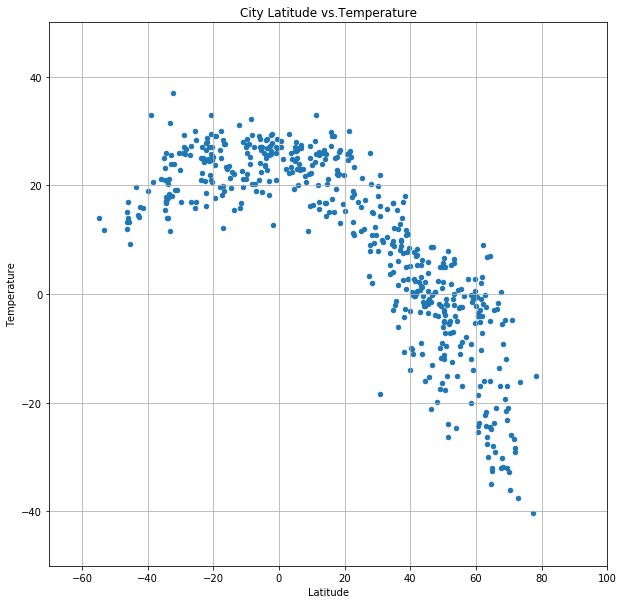

In [42]:

# Create a scatter plot which compares MPG to horsepower
latitude_temperature.plot(kind="scatter",  x="Latitude", y="Temperature", grid=True, figsize=(10,10), ylim=(-50, 50),
                          xlim=(-70, 100), title="City Latitude vs.Temperature")
plt.show()



In [51]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("Images/City Latitude vs.Temperature.png")
#plt.show()

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

In [18]:
# Filter the DataFrame down only to Latitude and Humidity.
latitude_Humidity = climate_df[["City","Latitude","Humidity"]]

# Set the index to be "State" so they will be used as labels
latitude_Humidity = latitude_Humidity.set_index("City")

latitude_Humidity.head()

,Latitude,Humidity
City,,
Bow Island,49.87,80
Natal,-5.81,74
Ushuaia,-54.81,84
Mar del Plata,-46.43,58
Bloomfield,40.75,69


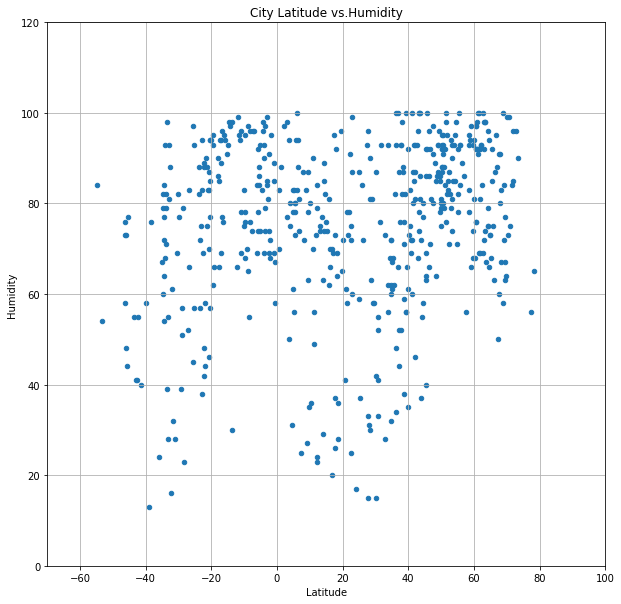

In [41]:


# Create a scatter plot which compares MPG to horsepower
latitude_Humidity.plot(kind="scatter",  x="Latitude", y="Humidity", grid=True, figsize=(10,10), 
                       ylim=(0, 120), xlim=(-70, 100), title="City Latitude vs.Humidity")
plt.show()

In [49]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("Images/latitude_Humidity.png")
plt.show()

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

In [22]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_cloudness = climate_df[["City","Latitude","cloudness"]]

# Set the index to be "State" so they will be used as labels
latitude_cloudness = latitude_cloudness.set_index("City")

latitude_cloudness.head()

,Latitude,cloudness
City,,
Bow Island,49.87,90
Natal,-5.81,20
Ushuaia,-54.81,40
Mar del Plata,-46.43,28
Bloomfield,40.75,1


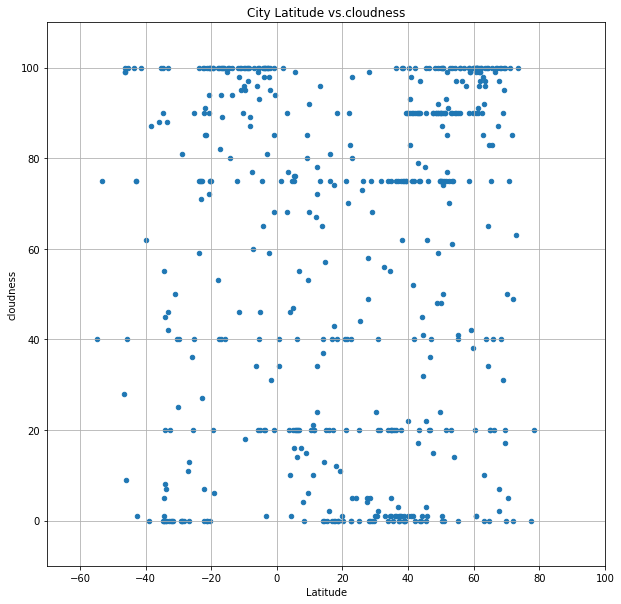

In [44]:
#set x and y limitis

# Create a scatter plot which compares MPG to horsepower
latitude_cloudness.plot(kind="scatter",  x="Latitude", y="cloudness", grid=True, figsize=(10,10),
              ylim=(-10, 110), xlim=(-70, 100), title="City Latitude vs.cloudness")
plt.show()

In [ ]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("../Images/IceCreamSales.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [27]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_windspeed = climate_df[["City","Latitude","windspeed"]]

# Set the index to be "State" so they will be used as labels
latitude_windspeed  = latitude_windspeed.set_index("City")

latitude_windspeed.head()

,Latitude,windspeed
City,,
Bow Island,49.87,10.80
Natal,-5.81,4.60
Ushuaia,-54.81,3.60
Mar del Plata,-46.43,5.56
Bloomfield,40.75,3.10


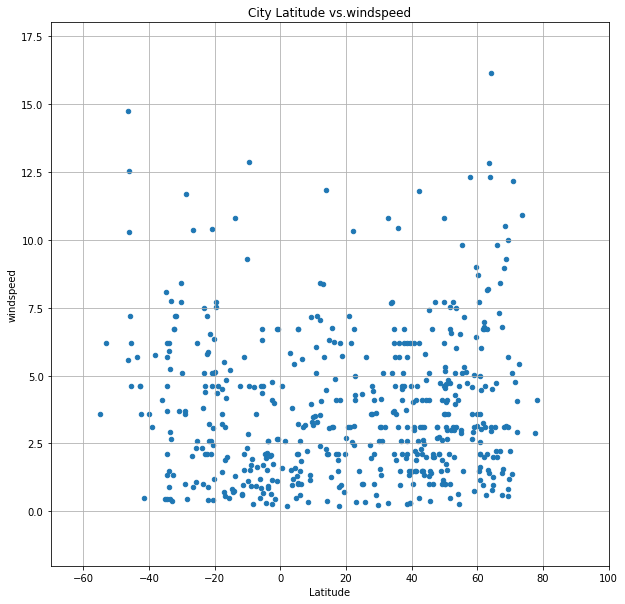

In [52]:
#set x and y limitis

# Create a scatter plot which compares MPG to horsepower
latitude_windspeed.plot(kind="scatter",  x="Latitude", y="windspeed", grid=True, figsize=(10,10),
              ylim=(-2,18), xlim=(-70, 100), title="City Latitude vs.windspeed")
plt.show()

In [ ]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("../Images/IceCreamSales.png")
plt.show()